In [1]:
import numpy as np
import qiskit.quantum_info
from sympy import *
from sympy.solvers import solve
import random
from qiskit import *
from qiskit import IBMQ
import pylatexenc
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy import linalg as sla
from IPython.display import clear_output
from numpy import linalg as la
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit import Parameter
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import *
from operator import itemgetter
from functools import reduce

In [11]:
file = open("key.txt", "r")
key = file.read()
IBMQ.save_account(key)
IBMQ.load_account()
provider = IBMQ.get_provider()

print(provider.backends())

backend = provider.get_backend('ibmq_qasm_simulator')

configrc.store_credentials:WARNING:2021-09-24 14:56:18,789: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-09-24 14:56:19,227: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

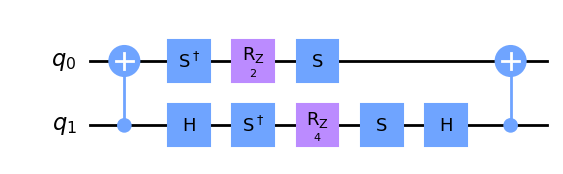

In [6]:
#TODO: turn off z terms

def make_cont_sys_circ(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    # temp.h(1)

    temp.cx(1, 0)
    temp.h(1)
    temp.sdg(0)
    temp.sdg(1)

    temp.rz(2 * time, 0)
    temp.rz(4 * time, 1)

    temp.s(0)
    temp.s(1)
    temp.h(1)
    temp.cx(1, 0)

    # temp.h(1)

    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return tempGate

temp = QuantumCircuit(2)

temp.append(make_cont_sys_circ(1), [0, 1])

temp.decompose().draw('mpl')

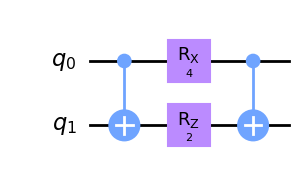

In [7]:
def make_cont_sys_circ2(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    temp.cx(0, 1)

    temp.rx(4 * time, 0)
    temp.rz(2 * time, 1)

    temp.cx(0, 1)


    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return tempGate

temp = QuantumCircuit(2)

temp.append(make_cont_sys_circ2(1), [0, 1])

temp.decompose().draw('mpl')

In [3]:
t1 = np.random.normal(0, 5)
t2 = np.random.normal(0, 5)
t3 = np.random.normal(0, 5)
t4 = np.random.normal(0, 5)
t5 = np.random.normal(0, 5)

t1
t2
t3
t4
t5

-2.178335986095385

In [4]:
#low overlap -- maybe find a way to guarantee this?
# t1 = -3.874444506605847
# t2 = -1.898967104374589
# t3 = 1.2839649933026793
# t4 = 4

# times used
# t1 = -7.682971153779546
# t2 = -5.374032720012178
# t3 = 1.1135803511904725

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

-4.350171291819883
-0.8090240157526684
3.0022525676461425
-2.018990765927736
-2.178335986095385


<ipython-input-8-68f6a58a80f5>:14: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  test = test + make_cycle(1, 1)
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\circuit\quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


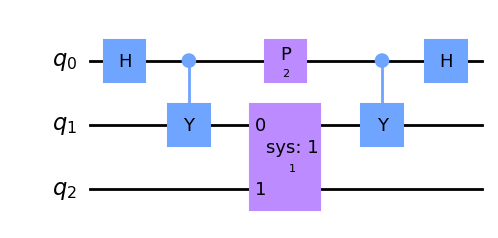

In [8]:
def make_cycle(time, eTarget):
    temp = QuantumCircuit(3)

    temp.h(0)
    temp.cy(0, 1)
    temp.append(make_cont_sys_circ(time), [1, 2])
    temp.p(time * eTarget * 2, 0)
    temp.cy(0, 1)
    temp.h(0)

    return temp

test = QuantumCircuit(3)
test = test + make_cycle(1, 1)
test.draw('mpl')

-3.0: 
512
{'00000': 512, '10011': 2, '10100': 1, '10111': 129, '11000': 4, '11001': 1, '11011': 77, '11111': 5, '00011': 5, '00100': 1, '00111': 215, '01000': 1, '01001': 2, '01011': 60, '01111': 9}
-1.0: 
0
{'00001': 20, '10001': 130, '10010': 19, '10101': 23, '10110': 276, '10111': 1, '11001': 31, '11010': 3, '11101': 1, '11110': 26, '00010': 3, '00101': 2, '00110': 35, '01000': 1, '01001': 236, '01010': 24, '01101': 9, '01110': 184}
1.0: 
485
{'00000': 485, '10001': 1, '10011': 1, '10101': 1, '10111': 159, '11000': 2, '11001': 1, '11011': 72, '11111': 6, '00011': 5, '00100': 3, '00101': 1, '00111': 217, '01000': 3, '01001': 2, '01011': 62, '01111': 3}
3.0: 
0
{'00001': 90, '10001': 103, '10010': 21, '10100': 1, '10101': 19, '10110': 143, '11001': 36, '11010': 20, '11100': 2, '11101': 104, '11110': 52, '00010': 63, '00011': 1, '00101': 23, '00110': 31, '00111': 1, '01000': 1, '01001': 140, '01010': 17, '01100': 2, '01101': 43, '01110': 110, '01111': 1}


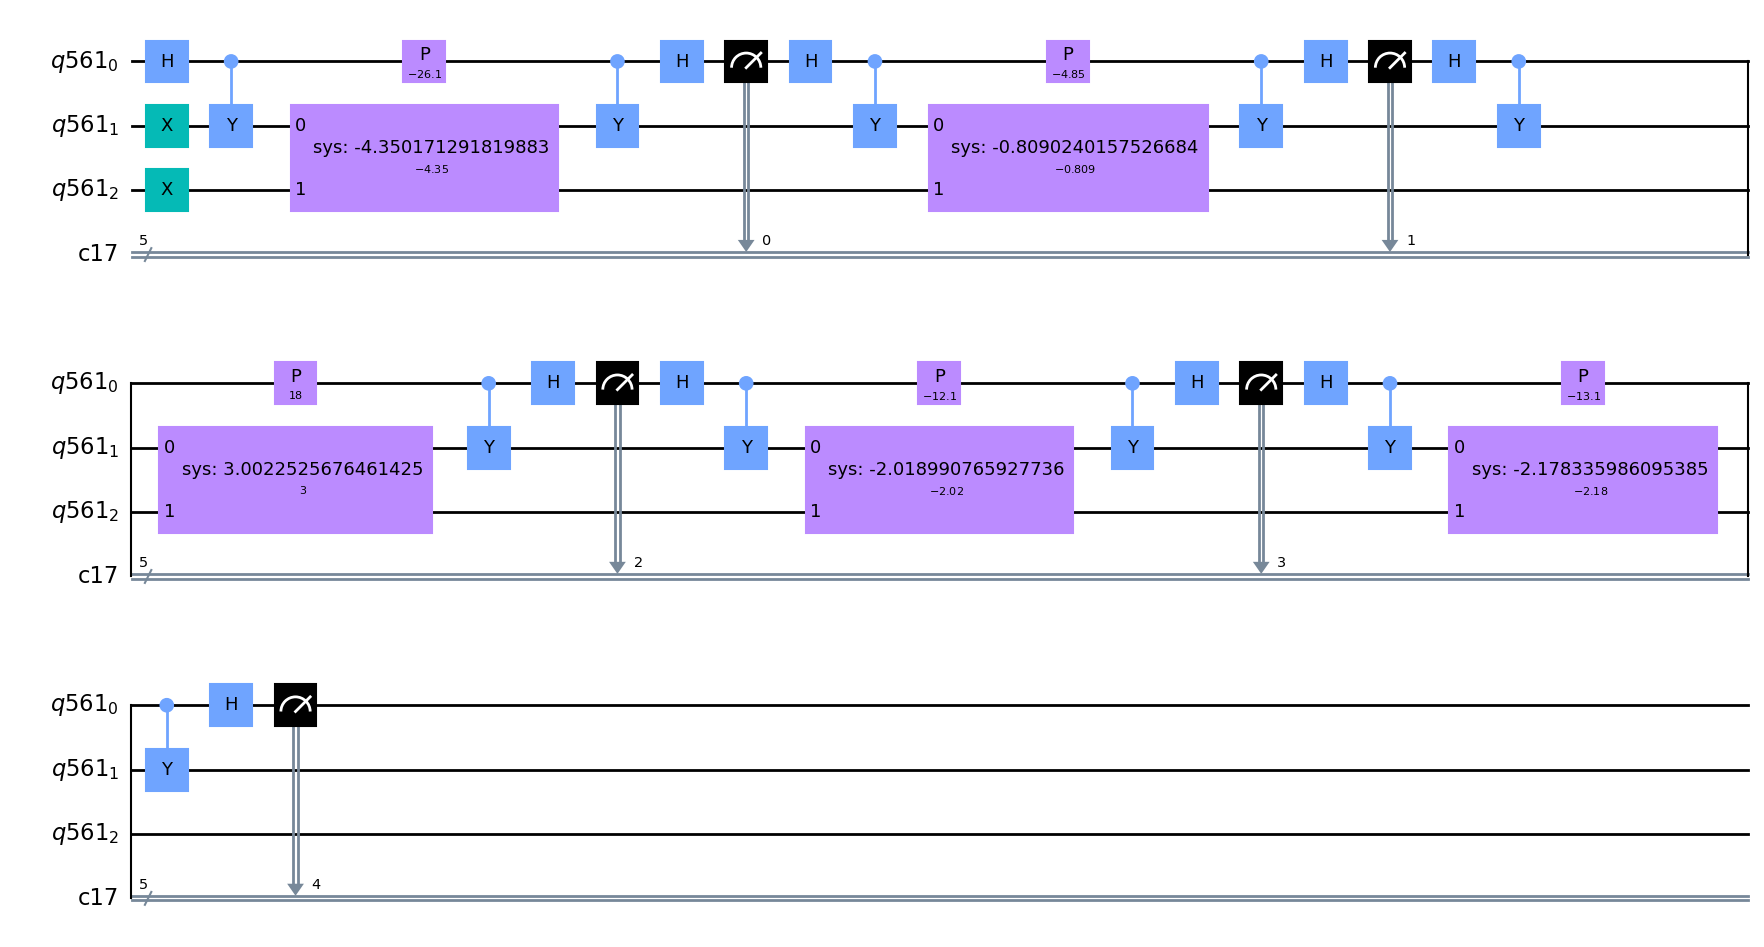

In [14]:
specSuccess4 = list()
specAll4 = list()

#initial_state = [1/sqrt(2), 0, 0, -1/sqrt(2), 0, 0, 0,0]
#initial_vector = qiskit.quantum_info.Statevector(initial_state)

# 000
# 001
# 010
# 011
# 100
# 101
# 110
# 111

#start with np.linspace to get few (~10) evenly sized bins
#use small times to search
#repeat search on peaks with larger times

for i in Range(4):
    energies = [-3,-1, 1, 3]
    eTarget = energies[i]
    # eTarget = -3 + (i) * 2
    # eTarget = i/10 - 5

    # eTarget = -3

    eTarget = float(eTarget)
    print(str(eTarget) + ": ")

    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(5))

    # rodeo.initialize(initial_vector)
    # rodeo.h(2)
    rodeo.x(1)
    rodeo.x(2)


    rodeo.compose(make_cycle(t1, eTarget), [0, 1, 2], inplace=True)
    rodeo.measure(0, 0) #cbit 0000n

    rodeo.compose(make_cycle(t2, eTarget), [0, 1, 2], inplace=True)
    rodeo.measure(0, 1) #cbit 000n0

    rodeo.compose(make_cycle(t3, eTarget), [0, 1, 2], inplace=True)
    rodeo.measure(0, 2) #cbit 00n00

    rodeo.compose(make_cycle(t4, eTarget), [0, 1, 2], inplace=True)
    rodeo.measure(0, 3) #cbit 0n000

    rodeo.compose(make_cycle(t5, eTarget), [0, 1, 2], inplace=True)
    rodeo.measure(0, 4) #cbit n0000

    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()

    numSuccess = job.result().get_counts().get('00000')
    if numSuccess is None:
        numSuccess = 0

    print(numSuccess)
    specSuccess4.append(numSuccess)

    print(job.result().get_counts())

rodeo.draw('mpl')

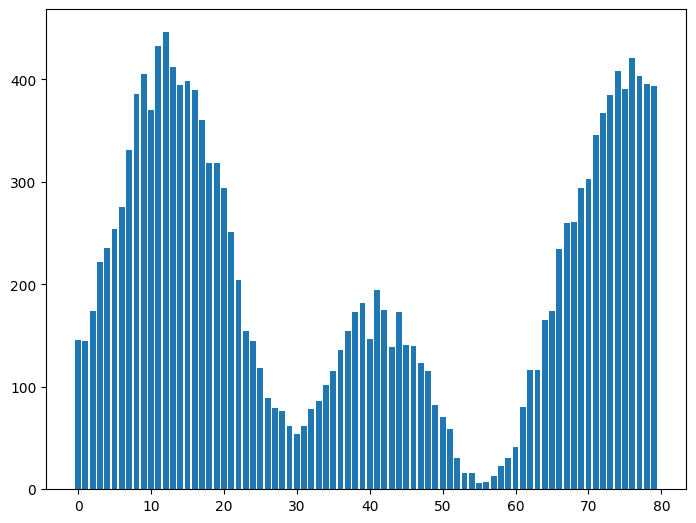

In [72]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# range = Range(80)
# ax.bar(range, specSuccess)
# plt.show()

In [10]:
print(job.result().get_counts())


{'0000': 81, '0001': 13, '0010': 86, '0011': 51, '0100': 35, '0101': 59, '0110': 82, '0111': 43, '1000': 24, '1001': 256, '1010': 29, '1011': 7, '1100': 195, '1101': 16, '1110': 28, '1111': 19}


[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -4.9, -4.8, -4.8, -4.7, -4.7, -4.7, -4.7, -4.7, -4.7, -4.7, -4.7, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.6, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.5, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.3, -4.2, -4.1, -4.1, -4.1, -4.1, -4.1, -4.1, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.9, -3.

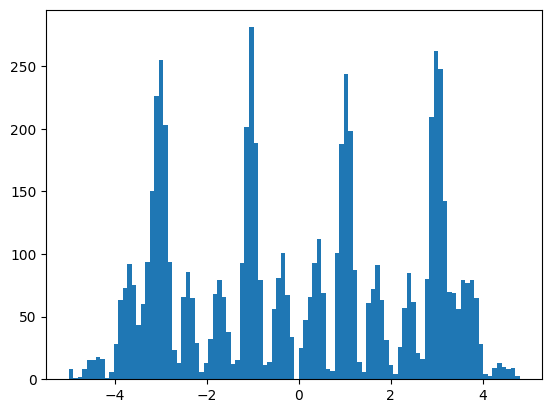

In [25]:
data = []


for i in Range(100):
    for j in Range(specSuccess4[i]):
        data.append(float(i/10 - 5))

print(data)

fig2 = plt.hist(data, bins=100)
plt.show()